In [106]:
# imports necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

In [107]:
# loads dataset
df = pd.read_csv("../data/challenge/train.csv")
df2 = pd.read_csv("../data/challenge/additive.csv")

#adds columns
df["cap"] = df2["CAPTC_DIA"]
df["resg"] = df2["RESG_DIA"]
df.drop(["Fluxo"],inplace=True,axis=1)

df = df.drop(["DT_COMPTC"], axis=1)

In [108]:
for coluna in ["Dol","IBOV","NDX","SPX"]:
    df[f"{coluna}_mean"] =df[coluna].shift(1)

for coluna in ["Dol_mean","IBOV_mean","NDX_mean","SPX_mean"]:
    df[coluna].iloc[0] =   df[coluna].iloc[1] 

In [109]:
df["NDX_SPX"] = df["NDX"]/df['SPX']
df["Dol_NDX"] = df["Dol"]/df["NDX"]
df["IBOV_NDX"] = df["IBOV"]/df["NDX"]
df["Dol_SPX"] = df["Dol"]/df["SPX"]
df["NDXXSPX"] = df["NDX"]*df['SPX']
df["DolXNDX"] = df["Dol"]*df["NDX"]
df["IBOVXNDX"] = df["IBOV"]*df["NDX"]
df["DolXSPX"] = df["Dol"]*df["SPX"]

In [110]:

# def lock_lim(df):
#     cols = df.columns
#     for col in cols:
#         q1 = np.percentile(df[col], 25)
#         q3 = np.percentile(df[col], 75)
#         iqr = q3 - q1
#         ls = q3 + 1.5*iqr
#         li = q1 - 1.5*iqr
#         df[col][df[col] < li] = li
#         df[col][df[col] > ls] = ls
    
#     return df

# print(df.describe())
# df = lock_lim(df)
# print(df.describe())

In [111]:
#características
X_train = df.drop(["cap","resg"],axis=1)[:2800]
X_test = df.drop(["cap","resg"],axis=1)[2800:]


#resposta
y_train = df[["cap"]][:2800]
y_test = df[["cap"]][2800:]

y_train2 = df[["resg"]][:2800]
y_test2 = df[["resg"]][2800:]

In [112]:
# padroniza os dados
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)


In [113]:
tscv = TimeSeriesSplit()
# model = MLPRegressor(activation= "identity",
#  alpha= 0.001,
#  early_stopping= True,
#  hidden_layer_sizes= (50, 20),
#  shuffle= True,
#  solver= "lbfgs")

# model2 = MLPRegressor(activation= "identity",
#  alpha= 0.001,
#  early_stopping= True,
#  hidden_layer_sizes= (50, 20),
#  shuffle= True,
#  solver= "lbfgs")

#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ pegar aqui gridsearch
#feature tools: https://www.featuretools.com/
tscv = TimeSeriesSplit()
model = MLPRegressor(activation= "identity",
 alpha= 0.001,
 early_stopping= True,
 hidden_layer_sizes= (50, 20),
 shuffle= True,
 solver= "lbfgs")

model2 = MLPRegressor(activation= "identity",
 alpha= 0.001,
 early_stopping= True,
 hidden_layer_sizes= (50, 20),
 shuffle= True,
 solver= "lbfgs")


model.fit(X_train,y_train)
model2.fit(X_train,y_train2)


c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

MLPRegressor(activation='identity', alpha=0.001, early_stopping=True,
             hidden_layer_sizes=(50, 20), solver='lbfgs')

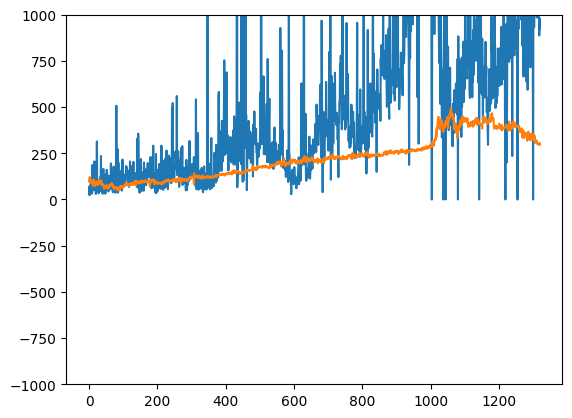

In [114]:
pred = model2.predict(X_test)
plt.ylim(top=2000)
plt.plot(np.arange(len(pred)),y_test)
plt.plot(np.arange(len(pred)),pred)
plt.ylim([-1000,1000])
plt.show()

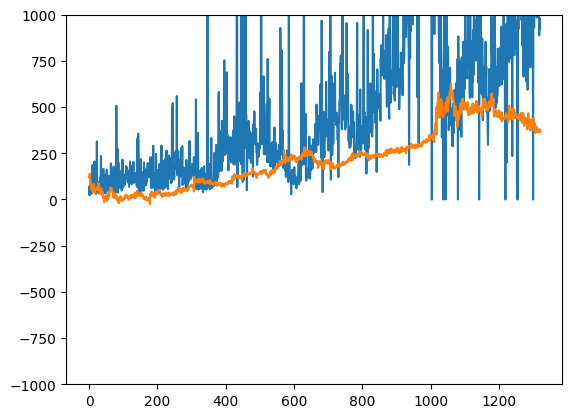

In [115]:
pred = model.predict(X_test)

plt.plot(np.arange(len(pred)),y_test)
plt.plot(np.arange(len(pred)),pred)
plt.ylim([-1000,1000])
plt.show()

In [116]:
model2.score(X_test,y_test2)

0.00849647329980141

In [117]:
df3 = pd.read_csv("../data/challenge/test.csv")
# values = np.arange(3000,len(df["DT_COMPTC"]))
# for i in range(1,5):
#     coluna = df.columns[i]
#     plt.subplot(2,2,i)
#     plt.plot(df["DT_COMPTC"][values],df[coluna][values])
#     plt.plot(df3["DT_COMPTC"],df3[coluna])
#     plt.title(coluna)
# plt.show()

for coluna in ["Dol","IBOV","NDX","SPX"]:
    df3[f"{coluna}_mean"] =df3[coluna].shift(1)

for coluna in ["Dol_mean","IBOV_mean","NDX_mean","SPX_mean"]:
    df3[coluna].iloc[0] =   df3[coluna].iloc[1] 

df3["NDX_SPX"] = df3["NDX"]/df3['SPX']
df3["Dol_NDX"] = df3["Dol"]/df3["NDX"]
df3["IBOV_NDX"] = df3["IBOV"]/df3["NDX"]
df3["Dol_SPX"] = df3["Dol"]/df3["SPX"]
df3["NDXXSPX"] = df3["NDX"]*df3['SPX']
df3["DolXNDX"] = df3["Dol"]*df3["NDX"]
df3["IBOVXNDX"] = df3["IBOV"]*df3["NDX"]
df3["DolXSPX"] = df3["Dol"]*df3["SPX"]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12568\2145492025.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[coluna].iloc[0] =   df3[coluna].iloc[1]


In [118]:
X_test = df3.drop(["DT_COMPTC"],axis=1)

In [119]:
X_test = scaler.fit_transform(X_test)

In [120]:
df3["cap"] = model.predict(X_test)
df3["resg"] = model2.predict(X_test)

In [121]:
df3["Fluxo"] = df3["cap"] - df3["resg"]

In [122]:
df4 = df3[["DT_COMPTC","Fluxo"]]

In [123]:
df4.to_csv("../organização/submission.csv", index=False)